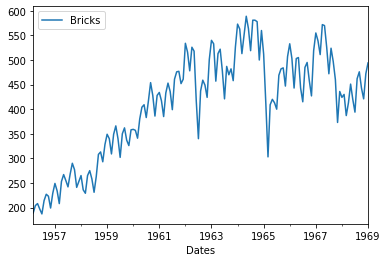

In [1]:
from pandas import read_excel
from matplotlib import pyplot
series = read_excel('ClayBricks.xls', sheet_name='BRICKSQ', header=0, index_col=0, parse_dates=True)
series.plot()
pyplot.show()

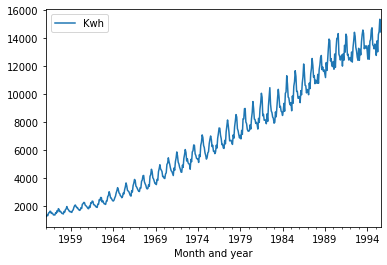

In [7]:
series = read_excel('Electricity.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
series.plot()
pyplot.show()